# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin? if we start very far from the origin we will sample just one point, because all the moves will be rejected (also beacause my $\delta$ is not so big).
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent? yes the result is equivalent.

#### Choosing a different starting point instead of the the origin

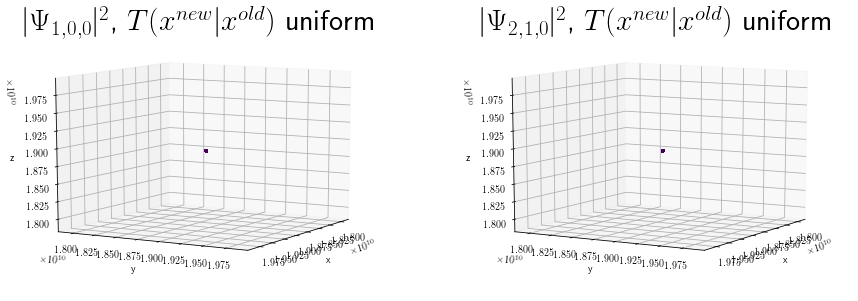

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
matplotlib.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(15,5))

X = np.loadtxt("tentativi/campionamenti100farorigin.txt",usecols=(0)) 
Y = np.loadtxt("tentativi/campionamenti100farorigin.txt",usecols=(1))
Z = np.loadtxt("tentativi/campionamenti100farorigin.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{1,0,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

X = np.loadtxt("tentativi/campionamenti210farorigin.txt",usecols=(0))  
Y = np.loadtxt("tentativi/campionamenti210farorigin.txt",usecols=(1))
Z = np.loadtxt("tentativi/campionamenti210farorigin.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{2,1,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

plt.show()

#### Choosing a small $\delta$ 

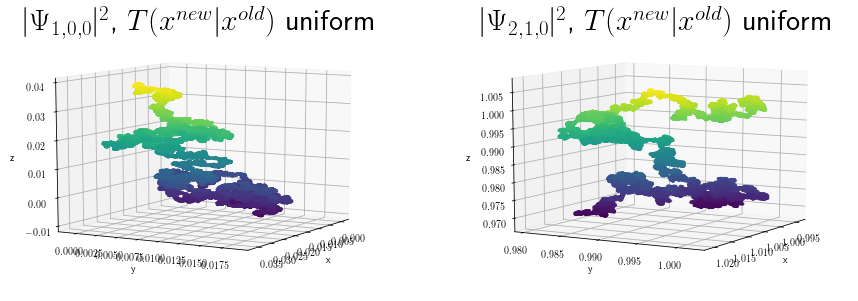

In [20]:

fig = plt.figure(figsize=(15,5))

X = np.loadtxt("tentativi/campionamenti100smalldelta.txt",usecols=(0)) 
Y = np.loadtxt("tentativi/campionamenti100smalldelta.txt",usecols=(1))
Z = np.loadtxt("tentativi/campionamenti100smalldelta.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{1,0,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

X = np.loadtxt("tentativi/campionamenti210smalldelta.txt",usecols=(0))  
Y = np.loadtxt("tentativi/campionamenti210smalldelta.txt",usecols=(1))
Z = np.loadtxt("tentativi/campionamenti210smalldelta.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{2,1,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

plt.show()

### Doing the right things, M = $10^6$

optimized parameters [a,l] = [ 0.97619447 13.6556646 ] , parameters uncertainty = [0.00304563 0.0626852 ]
optimized parameters [a,l] = [ 0.9781927  46.75968569] , parameters uncertainty = [0.00255534 0.24294258]


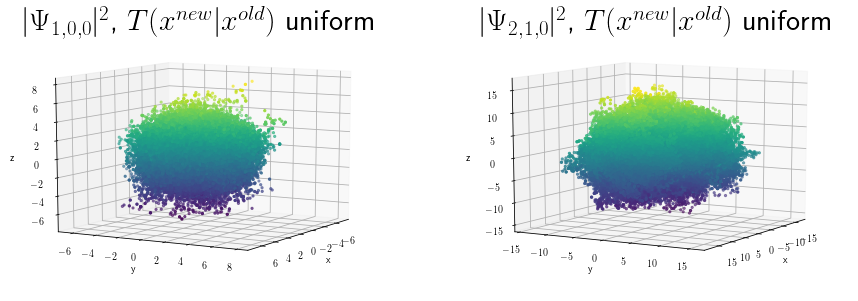

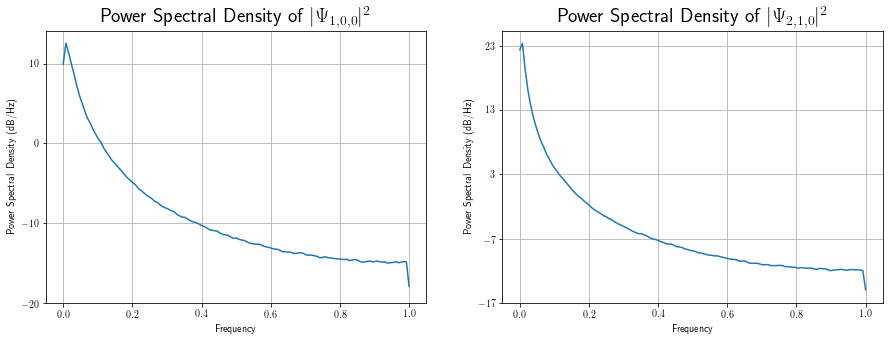

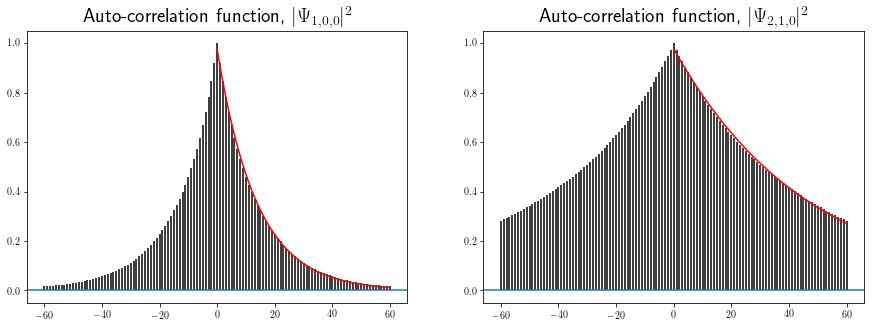

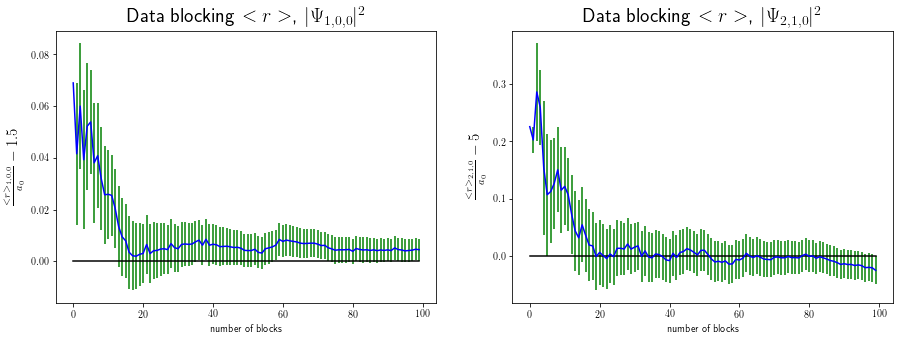

In [21]:
def f1(x,a,l):  # defining the fitting function
    return a * np.exp(-x/l)

N=100

fig = plt.figure(figsize=(15,5))

X = np.loadtxt("campionamenti100.txt",usecols=(0)) 
Y = np.loadtxt("campionamenti100.txt",usecols=(1))
Z = np.loadtxt("campionamenti100.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{1,0,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

X = np.loadtxt("campionamenti210.txt",usecols=(0))  
Y = np.loadtxt("campionamenti210.txt",usecols=(1))
Z = np.loadtxt("campionamenti210.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{2,1,0}}|^2$, $T(x^{new}|x^{old})$ uniform',fontsize=30)
ax.view_init(10,30)

r100 = np.loadtxt("r100all.txt",usecols=(0), delimiter=' ', unpack='true')
r210 = np.loadtxt("r210all.txt",usecols=(0), delimiter=' ', unpack='true')
Av_r100 = np.average(r100)
Av_r210 = np.average(r210)
r100_base = r100-Av_r100
r210_base = r210-Av_r210

################ POWER SPECTRAL DENSITY #########################

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].psd(r100_base)
axs[0].set_title("Power Spectral Density of $|\Psi_{1,0,0}|^2$",fontsize=20)
axs[1].psd(r210_base)
axs[1].set_title("Power Spectral Density of $|\Psi_{2,1,0}|^2$",fontsize=20)

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(r100_base[1000:],normed=True,maxlags=60)
x = xir[0][60:]
p_opt, p_cov = curve_fit(f1,x,xir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title(r"Auto-correlation function, $|\Psi_{1,0,0}|^2$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(r210_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title(r"Auto-correlation function, $|\Psi_{2,1,0}|^2$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
x = np.arange(N)
y = np.zeros(N)
sum_prog,err_prog = np.loadtxt("r100.txt",usecols=(0,1), delimiter=' ', unpack='true')
axs[0].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='g')
axs[0].set_ylabel(r"$\frac{<r>_{1,0,0}}{a_0}-1.5$",fontsize=15)
axs[0].set_xlabel("number of blocks")
axs[0].plot(x,y,color='black')
axs[0].set_title(r"Data blocking $<r>$, $|\Psi_{1,0,0}|^2$",fontsize=20)

sum_prog,err_prog = np.loadtxt("r210.txt",usecols=(0,1), delimiter=' ', unpack='true')
axs[1].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='g')
axs[1].set_ylabel(r"$\frac{<r>_{2,1,0}}{a_0}-5$",fontsize=15)
axs[1].set_xlabel("number of blocks")
axs[1].plot(x,y,color='black')
axs[1].set_title(r"Data blocking $<r>$, $|\Psi_{2,1,0}|^2$",fontsize=20)

plt.show()

### FIT CON FUNZIONE DI AUTOCORRELAZIONE:
- ho fittato la funzione di autocorrelazione con una funzione del tipo $a \cdot exp(\frac{-x}{l})$, dove quindi $l$ rappresenta la lunghezza di correlazione  
- la lunghezza di correlazione mi dice quanto devono essere grandi i blocchi per non avere misure correlate tra loro  
- $l_{1,0,0} \approx 14$  
- $l_{2,1,0} \approx 47$

optimized parameters [a,l] = [ 0.95981581 15.50491205] , parameters uncertainty = [0.00719176 0.17096523]
optimized parameters [a,l] = [0.97923237 9.59353033] , parameters uncertainty = [0.00301096 0.043916  ]


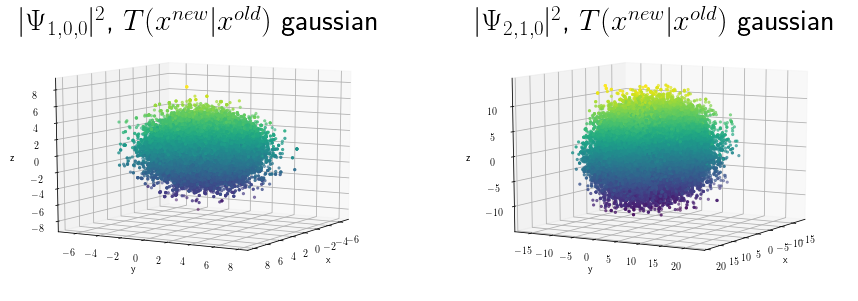

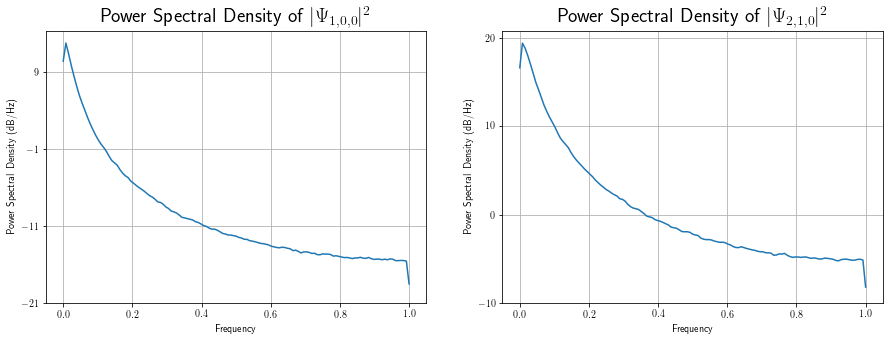

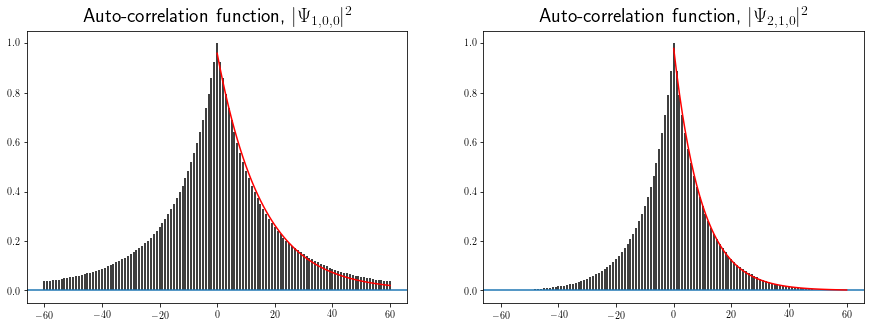

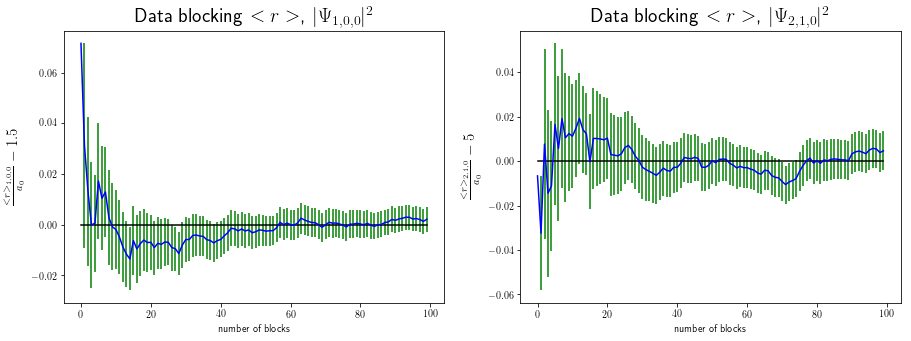

In [22]:
fig = plt.figure(figsize=(15,5))

X = np.loadtxt("campionamenti100gauss.txt",usecols=(0)) 
Y = np.loadtxt("campionamenti100gauss.txt",usecols=(1))
Z = np.loadtxt("campionamenti100gauss.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{1,0,0}}|^2$, $T(x^{new}|x^{old})$ gaussian',fontsize=30)
ax.view_init(10,30)

X = np.loadtxt("campionamenti210gauss.txt",usecols=(0))  
Y = np.loadtxt("campionamenti210gauss.txt",usecols=(1))
Z = np.loadtxt("campionamenti210gauss.txt",usecols=(2))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$|{\Psi_{2,1,0}}|^2$, $T(x^{new}|x^{old})$ gaussian',fontsize=30)
ax.view_init(10,30)

r100 = np.loadtxt("r100allgauss.txt",usecols=(0), delimiter=' ', unpack='true')
r210 = np.loadtxt("r210allgauss.txt",usecols=(0), delimiter=' ', unpack='true')
Av_r100 = np.average(r100)
Av_r210 = np.average(r210)
r100_base = r100-Av_r100
r210_base = r210-Av_r210

################ POWER SPECTRAL DENSITY #########################

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].psd(r100_base)
axs[0].set_title("Power Spectral Density of $|\Psi_{1,0,0}|^2$",fontsize=20)
axs[1].psd(r210_base)
axs[1].set_title("Power Spectral Density of $|\Psi_{2,1,0}|^2$",fontsize=20)

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(r100_base[1000:],normed=True,maxlags=60)
x = xir[0][60:]
p_opt, p_cov = curve_fit(f1,x,xir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title(r"Auto-correlation function, $|\Psi_{1,0,0}|^2$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(r210_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title(r"Auto-correlation function, $|\Psi_{2,1,0}|^2$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
x = np.arange(N)
y = np.zeros(N)
sum_prog,err_prog = np.loadtxt("r100gauss.txt",usecols=(0,1), delimiter=' ', unpack='true')
axs[0].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='g')
axs[0].set_ylabel(r"$\frac{<r>_{1,0,0}}{a_0}-1.5$",fontsize=15)
axs[0].set_xlabel("number of blocks")
axs[0].plot(x,y,color='black')
axs[0].set_title(r"Data blocking $<r>$, $|\Psi_{1,0,0}|^2$",fontsize=20)

sum_prog,err_prog = np.loadtxt("r210gauss.txt",usecols=(0,1), delimiter=' ', unpack='true')
axs[1].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='g')
axs[1].set_ylabel(r"$\frac{<r>_{2,1,0}}{a_0}-5$",fontsize=15)
axs[1].set_xlabel("number of blocks")
axs[1].plot(x,y,color='black')
axs[1].set_title(r"Data blocking $<r>$, $|\Psi_{2,1,0}|^2$",fontsize=20)

plt.show()



### FIT CON FUNZIONE DI AUTOCORRELAZIONE:
- ho fittato la funzione di autocorrelazione con una funzione del tipo $a \cdot exp(\frac{-x}{l})$, dove quindi $l$ rappresenta la lunghezza di correlazione  
- la lunghezza di correlazione mi dice quanto devono essere grandi i blocchi per non avere misure correlate tra loro  
- $l_{1,0,0} \approx 16$  
- $l_{2,1,0} \approx 10$